In [2]:
'''
Jan 29, 2017
CPM
Selling time of used car

https://www.kaggle.com/orgesleka/used-cars-database
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/autos.csv', sep=',', header=0, encoding='cp1252')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df['offerType'].nunique()

2

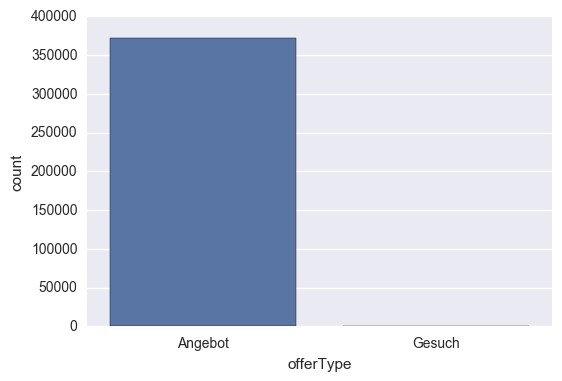

In [5]:
sns.countplot(df['offerType'])

In [6]:
# cleaning data
cols = ['name','seller','offerType','abtest','nrOfPictures','postalCode']
cols = [c for c in cols if c in df.columns]
print(cols)
for col in cols:
    df = df.drop(col,axis=1)
print(df.columns)
# creating new variables 'selling time'
from datetime import datetime
from datetime import timedelta

def str2time(string):
    return datetime.strptime(string,'%Y-%m-%d %H:%M:%S')

a = df['lastSeen'].apply(str2time)
b = df['dateCreated'].apply(str2time)
df['selling_t'] = (a-b)
df['selling_t_sec'] = df['selling_t'].apply(lambda x: x.total_seconds())

labels = [int(i/518400) for i in range(0, 3628800, 518400)]
df['selling_t_w'] = pd.cut(df['selling_t_sec'],range(0, 4147200, 518400), right=False, labels=labels)

# removing all outlier
no_outlier = df[(df['yearOfRegistration']<=2016) &
                (df['yearOfRegistration']>=1950) &
                (df['price']>=100) &
                (df['price']<=150000) &
                (df['powerPS']>=10) &
                (df['powerPS']<=500) &
                (df['selling_t_sec']<4147200) # less than 6 weeks
                ]
# no Nan
df_clean = no_outlier.dropna()

['name', 'seller', 'offerType', 'abtest', 'nrOfPictures', 'postalCode']
Index(['dateCrawled', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'dateCreated', 'lastSeen'],
      dtype='object')


In [7]:
df_clean.columns

Index(['dateCrawled', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'dateCreated', 'lastSeen', 'selling_t',
       'selling_t_sec', 'selling_t_w'],
      dtype='object')

In [8]:
df_clean.groupby('model').count().sort_values('dateCrawled',ascending=False)['dateCrawled'].head(10)

model
golf        20073
andere      18748
3er         14961
polo         8225
corsa        7616
a4           7589
passat       7230
astra        7166
5er          6588
c_klasse     6575
Name: dateCrawled, dtype: int64

In [9]:
df_clean['yearOfRegistration'].unique()

array([2001, 2008, 1995, 2004, 2005, 2011, 2007, 2009, 2002, 1997, 1990,
       1981, 2003, 1984, 1999, 1998, 2012, 2014, 2006, 2010, 2013, 2000,
       1994, 1991, 1996, 1989, 2015, 1968, 1992, 1993, 1983, 1959, 1973,
       1969, 1971, 1987, 1988, 1967, 2016, 1980, 1986, 1985, 1965, 1974,
       1979, 1982, 1978, 1976, 1972, 1977, 1966, 1975, 1970, 1963, 1961,
       1962, 1960, 1951, 1964, 1953, 1954, 1957, 1958, 1956, 1950, 1955,
       1952], dtype=int64)

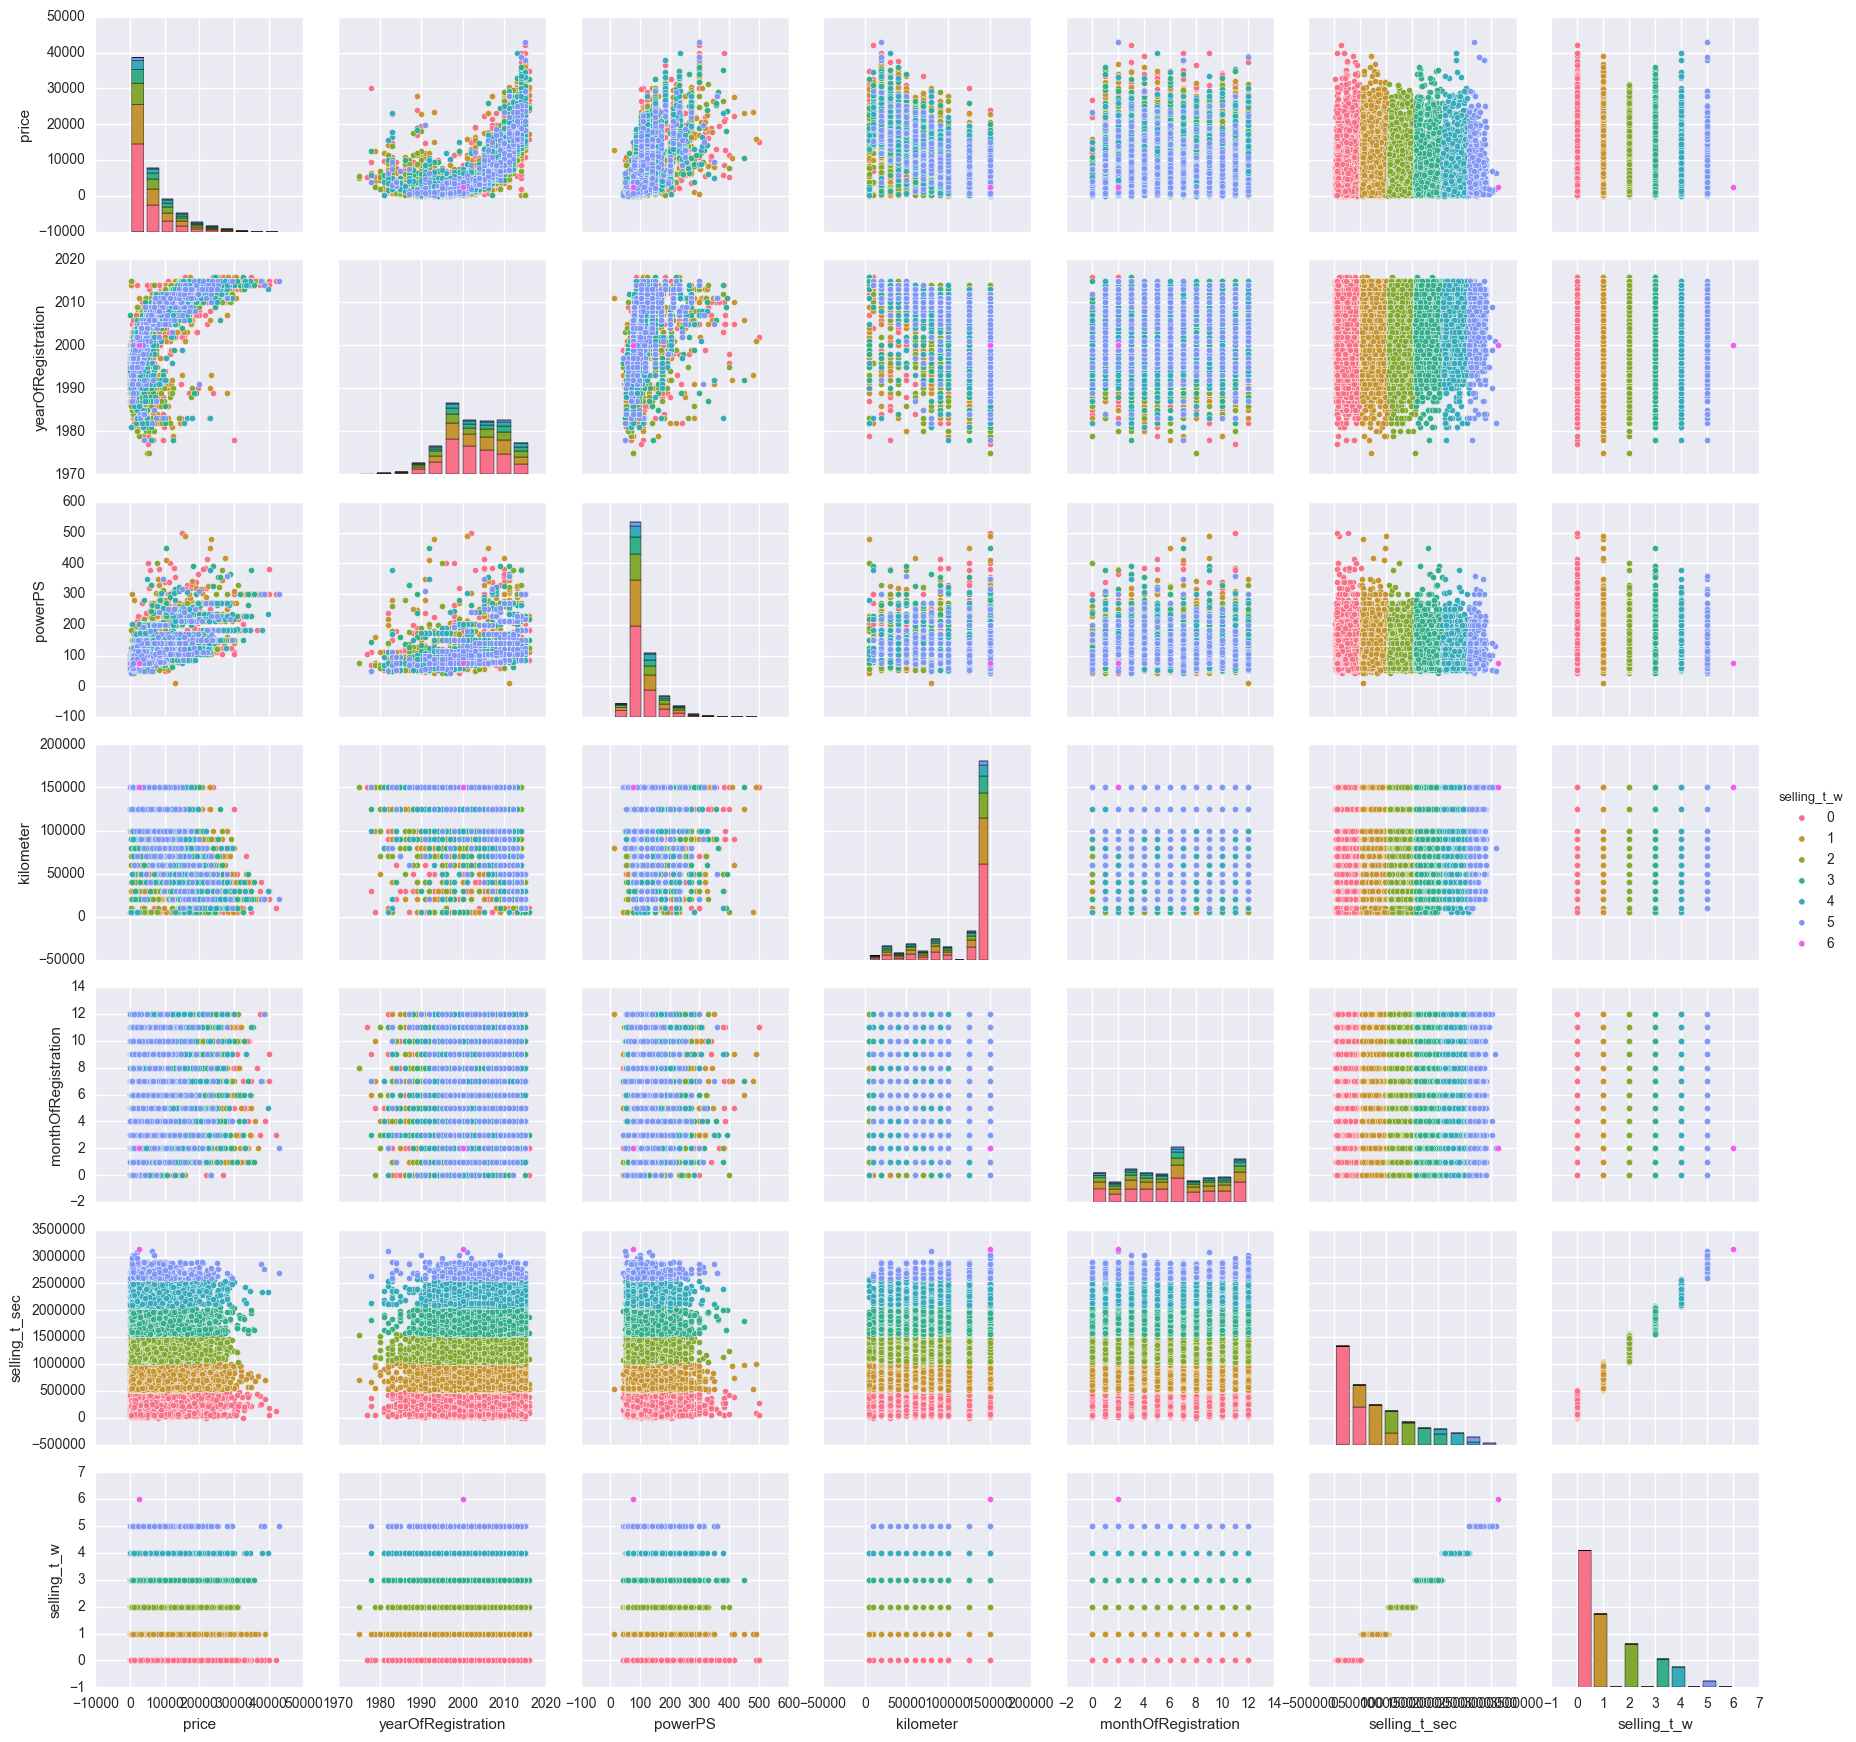

In [10]:
sns.pairplot(df_clean[df_clean['model']=='golf'],hue='selling_t_w')

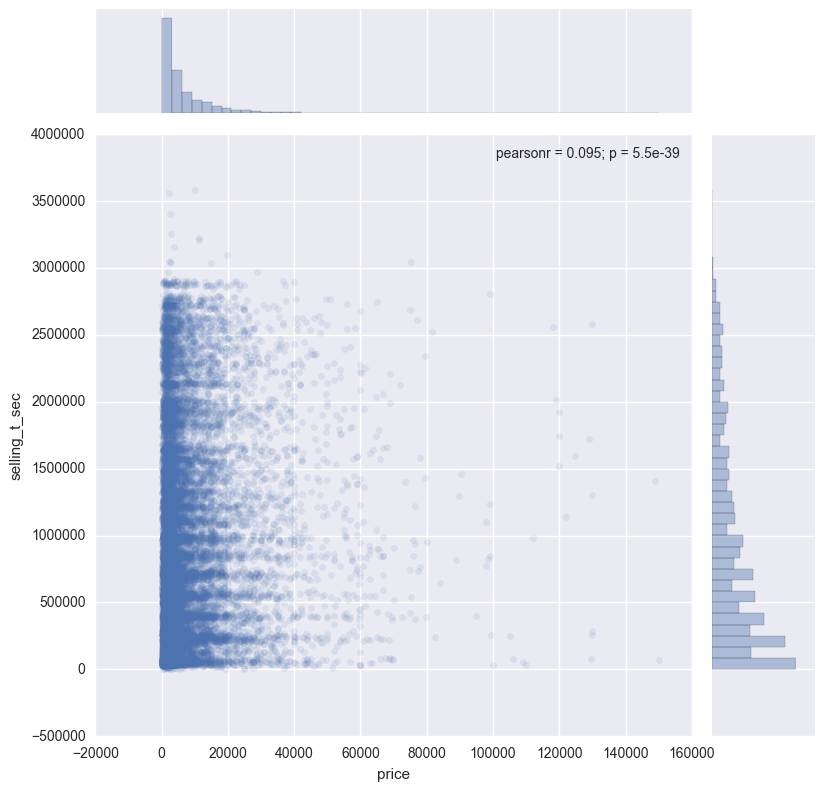

In [11]:
sns.jointplot(x='price',y='selling_t_sec',data=df_clean[df_clean['model']=='andere'],alpha=0.1, size=8)

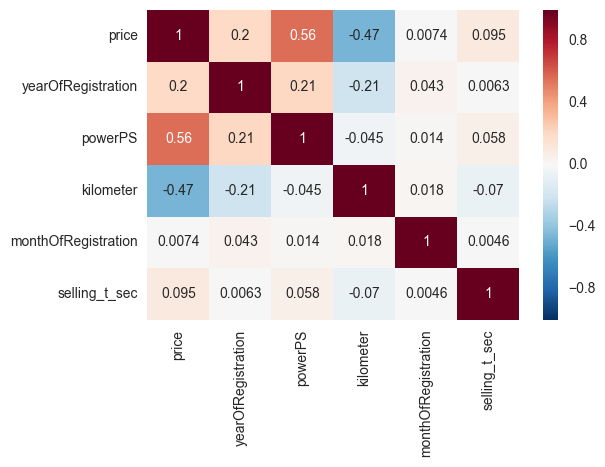

In [12]:
sns.heatmap(df_clean[(df_clean['model']=='andere')].corr(),annot=True)

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans

C:\Users\Weizen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
kmeans = KMeans(n_clusters=4)

In [15]:
df_model = df_clean[df_clean['model']=='golf']
kmeans.fit(df_model[['price','yearOfRegistration','powerPS','kilometer','monthOfRegistration']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [17]:
def speed(week):
    if week <= 1:
        return 0
    elif week <= 2:
        return 1
    elif week <= 4:
        return 2
    else:
        return 3

df_model['speed'] = df_model['selling_t_w'].apply(speed)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


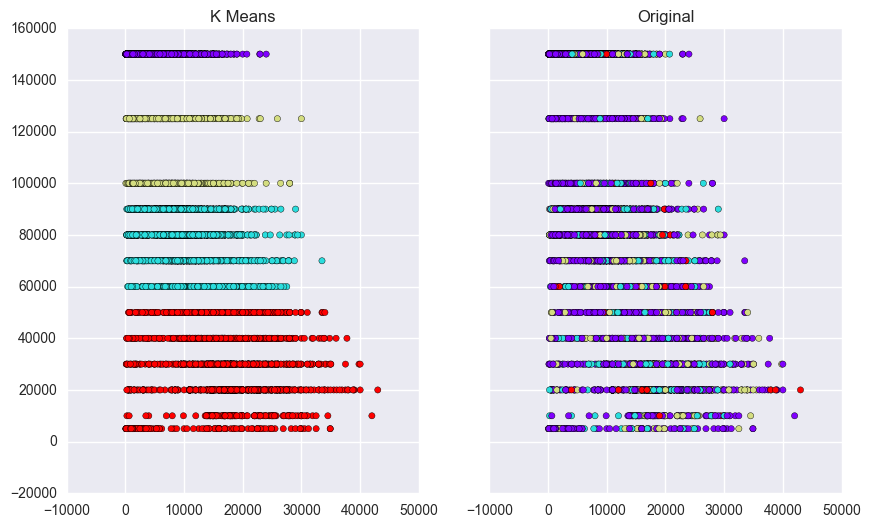

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(df_model['price'],df_model['kilometer'],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(df_model['price'],df_model['kilometer'],c=df_model['speed'],cmap='rainbow')

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(df_model['speed'],kmeans.labels_))
print(classification_report(df_model['speed'],kmeans.labels_))

[[9203 1488 1787 1219]
 [1671  413  400  316]
 [1811  457  439  444]
 [ 242   82   52   49]]
             precision    recall  f1-score   support

          0       0.71      0.67      0.69     13697
          1       0.17      0.15      0.16      2800
          2       0.16      0.14      0.15      3151
          3       0.02      0.12      0.04       425

avg / total       0.54      0.50      0.52     20073



In [21]:
# linear

In [48]:
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

r = range(2003, 2017)
km_year = 10000

X = df_model[['yearOfRegistration','powerPS','kilometer','monthOfRegistration','selling_t_sec']]
y = df_model['price']


In [49]:
linear = linear_model.LinearRegression()

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = .3

#Split into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 23)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
linear.fit(X_train, y_train)

predictions = linear.predict(X_test)
# Explained variance score: 1 is perfect prediction
score = linear.score(X_test, y_test)
print('Variance score: %.2f' % score)

print("rmse on validation set", cv_rmse(linear, X_test, y_test).mean())

(14051, 5) (6022, 5) (14051,) (6022,)
Variance score: 0.81
rmse on validation set 2598.18617436


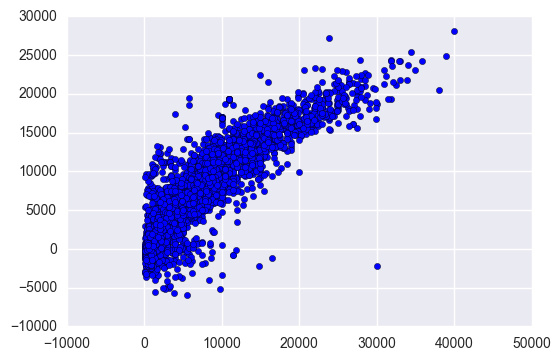

In [50]:
plt.scatter(y_test,predictions)